# Pole Balancing Results

## Setup

In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
from custom_neat.nn.recurrent import RNN
from custom_neat.genome import Genome

import cart_pole

In [2]:
BASE_DIR = '../experiments/single_pole_balancing_no_velocities/'

## Performance

In [3]:
def load_genome(path):
    """Load a pickled genome.
    
    Args:
        path (str): The path to the pickled genome object.
    
    Returns:
        Genome: The genome.
    """
    return pickle.load(open(path, 'rb'))

In [4]:
def evaluate_genome(genome, action_space, n_episodes=10, max_time_steps=1000):
    """Evaluate a genome.
    
    Genomes are evaluated by measuring the average balance time over a
    number of episodes.
    
    Args:
        genome (Genome): The genome to evaluate.
        action_space (str): The action space the agent was trained on. Either
            'continuous' or 'discrete'.
        n_episodes (int): The number of episodes over which to evaluate the
            agent.
        max_time_steps (int): The maximum number of time steps to evaluate a
            genome for.
    Returns:
        float: The average fitness over all episodes.
    """
    network = RNN.create(genome)
    
    episode_fitnesses = []
    for i in range(n_episodes):
        sim = cart_pole.CartPole(x=0.0, dx=0.0, theta=1.0, dtheta=0.0)
        network.reset()
        time_steps = 0

        while time_steps < max_time_steps:
            # Get normalised inputs in the range [-1, 1]
            observation = sim.get_scaled_state()
            observation = [observation[0], observation[2]]  # Remove velocities

            output = network.forward(observation)
            
            if action_space == 'continuous':
                action = cart_pole.continuous_actuator_force(output)
            elif action_space == 'discrete':
                action = cartpole.discrete_actuator_force(output)
            else:
                raise RuntimeError(f'Invalid action space: {action_space}')

            sim.step(action)
            sim.step(0)  # Skip every 2nd time step

            # Stop if network fails to keep the cart within the position or
            # angle limits
            if abs(sim.x) >= sim.position_limit or abs(sim.theta) >= sim.angle_limit_radians:
                break

            time_steps += 1

        episode_fitnesses.append(sim.t)

    return sum(episode_fitnesses) / len(episode_fitnesses)

### Continuous Action Space, Oscillation Dampening Fitness Function

First, perform a set of evolutionary runs using $1.0$ in the fitness function.

In [8]:
path_template = BASE_DIR + '/cont_oscil_results/run_{}/solution_{}.pickle'

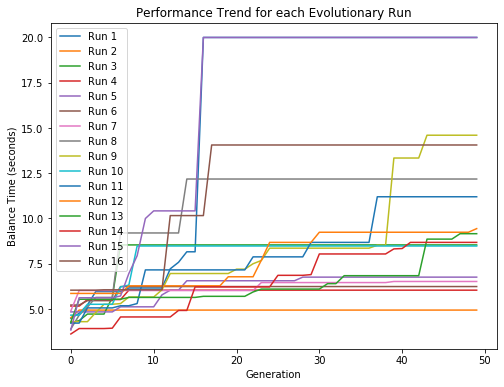

In [9]:
# Plot fitness over time for each run
plt.figure(figsize=(8,6))

generations = [i for i in range(50)]
for run in range(1, 17):
    genomes = [load_genome(path_template.format(run, g)) for g in generations]
    balance_times = [evaluate_genome(g, 'continuous') for g in genomes]
    
    plt.plot(generations, balance_times, label=f'Run {run}')
    
plt.title('Performance Trend for each Evolutionary Run')
plt.xlabel('Generation')
plt.ylabel('Balance Time (seconds)')
plt.legend(loc='best')
plt.show()

Second, perform a set of evolutionary runs using $0.75$ in the fitness function.

In [10]:
path_template = BASE_DIR + '/cont_oscil_results_2/run_{}/solution_{}.pickle'

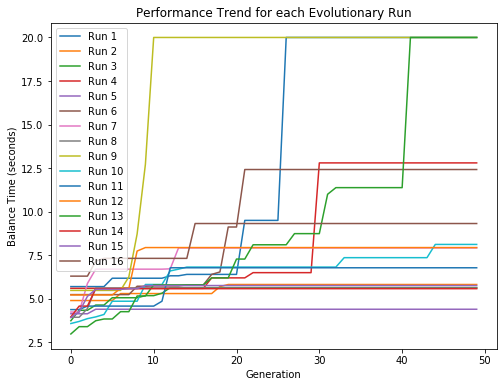

In [11]:
# Plot fitness over time for each run
plt.figure(figsize=(8,6))

generations = [i for i in range(50)]
for run in range(1, 17):
    genomes = [load_genome(path_template.format(run, g)) for g in generations]
    balance_times = [evaluate_genome(g, 'continuous') for g in genomes]
    
    plt.plot(generations, balance_times, label=f'Run {run}')
    
plt.title('Performance Trend for each Evolutionary Run')
plt.xlabel('Generation')
plt.ylabel('Balance Time (seconds)')
plt.legend(loc='best')
plt.show()

### Continuous Action Space, Balance Time Fitness Function

In [10]:
path_template = BASE_DIR + '/cont_basic_results/run_{}/solution_{}.pickle'

In [ ]:
# Plot fitness over time for each run
plt.figure(figsize=(8,6))

generations = [i for i in range(50)]
for run in range(1, 13):
    genomes = [load_genome(path_template.format(run, g)) for g in generations]
    balance_times = [evaluate_genome(g, 'continuous') for g in genomes]
    
    plt.plot(generations, balance_times, label=f'Run {run}')
    
plt.title('Performance Trend for each Evolutionary Run')
plt.xlabel('Generation')
plt.ylabel('Balance Time (seconds)')
plt.legend(loc='best')
plt.show()

### Discrete Action Space, Oscillation Dampening Fitness Function

In [10]:
path_template = BASE_DIR + '/disc_oscil_results/run_{}/solution_{}.pickle'

In [ ]:
# Plot fitness over time for each run
plt.figure(figsize=(8,6))

generations = [i for i in range(50)]
for run in range(1, 13):
    genomes = [load_genome(path_template.format(run, g)) for g in generations]
    balance_times = [evaluate_genome(g, 'continuous') for g in genomes]
    
    plt.plot(generations, balance_times, label=f'Run {run}')
    
plt.title('Performance Trend for each Evolutionary Run')
plt.xlabel('Generation')
plt.ylabel('Balance Time (seconds)')
plt.legend(loc='best')
plt.show()

### Discrete Action Space, Balance Time Fitness Function

In [10]:
path_template = BASE_DIR + '/cont_oscil_results/run_{}/solution_{}.pickle'

In [ ]:
# Plot fitness over time for each run
plt.figure(figsize=(8,6))

generations = [i for i in range(50)]
for run in range(1, 13):
    genomes = [load_genome(path_template.format(run, g)) for g in generations]
    balance_times = [evaluate_genome(g, 'continuous') for g in genomes]
    
    plt.plot(generations, balance_times, label=f'Run {run}')
    
plt.title('Performance Trend for each Evolutionary Run')
plt.xlabel('Generation')
plt.ylabel('Balance Time (seconds)')
plt.legend(loc='best')
plt.show()